# Gradient Descent

This notebook is aimed at manipulating the gradient descent algorithm in simple cases to figure out part of it's use cases.

## Linear Regression

Let's start first by generating a dummy dataset.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
size = 1000
X = 10*np.random.rand(size , 1)
y = 5 + 4*X + 4*np.random.randn(size, 1) + X*np.cos(X)

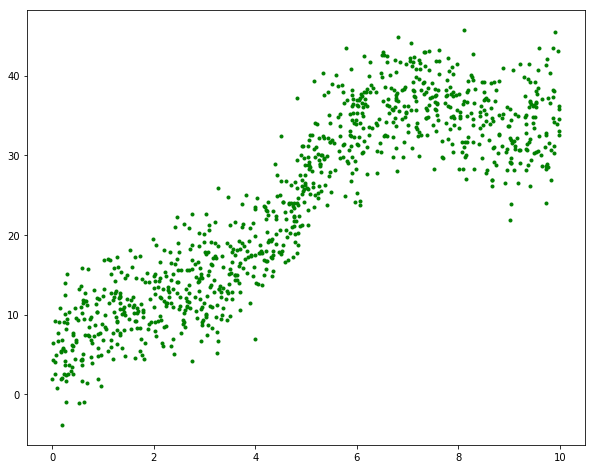

In [22]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y, 'g.')

In [23]:
import sklearn as sk

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
from sklearn.base import BaseEstimator

In [142]:
class myLinearRegression(BaseEstimator):
    """Linear Regression Model using gradient descent for training."""
    def __init__(self, alpha=None):
        """alpha is initial parameter value."""
        self.alpha = alpha
    def fit(self, X, y, tol=0.0001, rate=0.01, max_iter=1000):
        """Training method. Gradient descent training."""
        m, n = X.shape[0], X.shape[1]
        X_ones = np.r_[np.ones((1, m)), X_train.reshape(1, -1)]
        if not self.alpha:
            self.alpha = np.random.rand(n + 1, 1)
        cpt = 0
        gradient = tol + 1
        while cpt < max_iter and  np.linalg.norm(gradient) > tol:
            # Update formula
            gradient = (1/m)*(self.alpha.T.dot(X_ones) - y.T).dot(X_ones.T)
            self.alpha = (self.alpha.T - (rate) * gradient).T
            cpt += 1
    def predict(self, X):
        """Prediction method. It takes multi-instances one per row."""
        X_ones = np.r_[np.ones((1, X.shape[0])), X.reshape(1, -1)]
        return self.alpha.T.dot(X_ones).T

In [143]:
my_lin_reg = myLinearRegression()

In [144]:
my_lin_reg.fit(X_train, y_train)

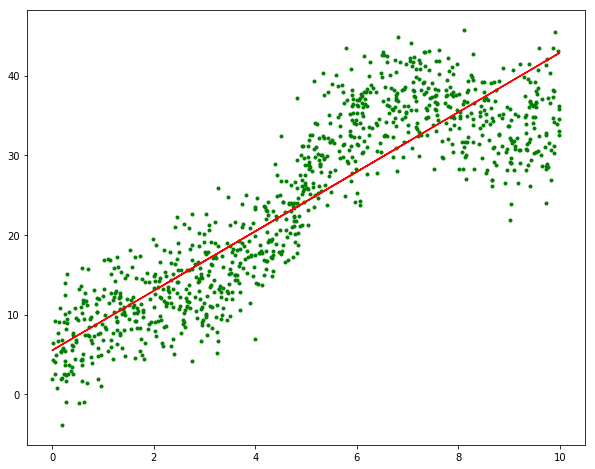

In [145]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y, 'g.')
ax.plot(X, my_lin_reg.predict(X), 'r-')

In [109]:
m, n = X_train.shape[0], X_train.shape[1]
X_ones = np.r_[np.ones((1, m)), X_train.reshape(1, -1)]
alpha = np.random.rand(n + 1, 1)
rate = 0.01
for _ in range(500):
    # Update formula
    gradient = (1/m)*(alpha.T.dot(X_ones) - y_train.T).dot(X_ones.T)
    alpha = (alpha.T - (rate) * gradient).T

In [110]:
alpha

array([[4.65054419],
       [3.86889117]])

In [84]:
A = np.array([2, 3])
A.reshape(2, -1).shape

(2, 1)

In [85]:
np.r_[np.ones((1, 2)), A.reshape(1, -1)]

array([[1., 1.],
       [2., 3.]])

In [152]:
np.linalg.norm??

In [146]:
from sklearn.linear_model import LinearRegression

In [149]:
from sklearn.linear_model import LogisticRegression

In [151]:
LogisticRegression??